In [32]:
import numpy as np
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata("MNIST original")

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [7]:
X_train = np.array(X[:60000], dtype = float)
y_train = np.array(y[:60000], dtype = float)
X_test = np.array(X[60000:], dtype = float)
y_test = np.array(y[60000:], dtype = float)

In [8]:
X_train.shape

(60000, 784)

In [9]:
y_test.shape

(10000,)

## 使用kNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

CPU times: user 24.4 s, sys: 283 ms, total: 24.6 s
Wall time: 28.3 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
%time knn_clf.score(X_test, y_test)

CPU times: user 13min 29s, sys: 4.53 s, total: 13min 34s
Wall time: 19min 40s


0.9688

## PCA进行降维

In [15]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [16]:
X_train_reduction.shape

(60000, 87)

In [17]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

CPU times: user 409 ms, sys: 7.91 ms, total: 417 ms
Wall time: 716 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
X_test_reduction = pca.transform(X_test)

In [20]:
%time knn_clf.score(X_test_reduction, y_test)

CPU times: user 1min 21s, sys: 640 ms, total: 1min 22s
Wall time: 1min 52s


0.9728

In [42]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [43]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [44]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

In [45]:
example_digits.shape

(100, 64)

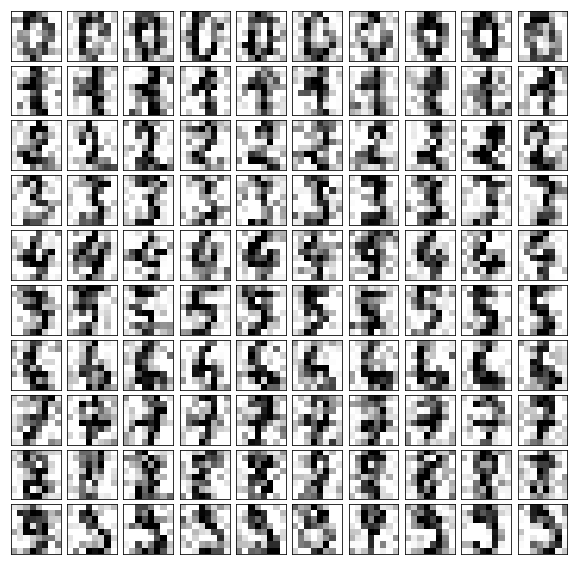

In [46]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [47]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca.n_components_

12

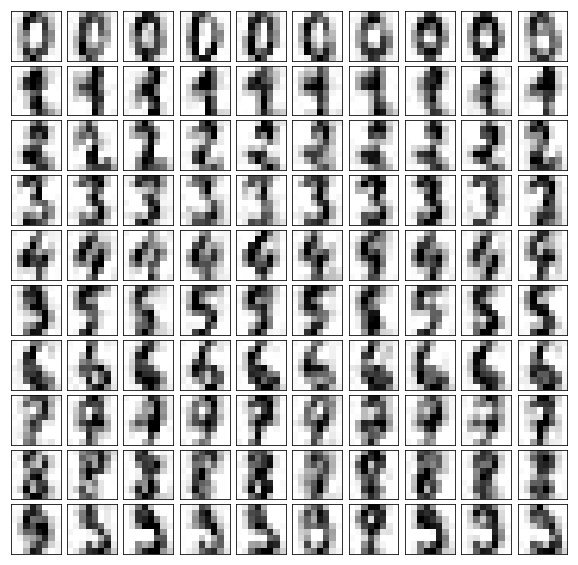

In [51]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

## 特征脸

In [52]:
from sklearn.datasets import fetch_lfw_people

In [53]:
faces = fetch_lfw_people()

In [55]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [56]:
faces.data.shape

(13233, 2914)

In [57]:
faces.images.shape

(13233, 62, 47)

In [58]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [60]:
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

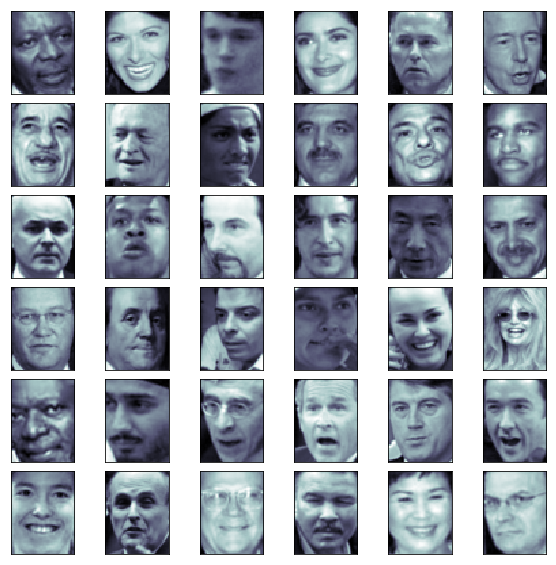

In [61]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10), subplot_kw= {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62,47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

In [63]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

## 特征脸

In [64]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

CPU times: user 1min 28s, sys: 2.38 s, total: 1min 30s
Wall time: 53 s


In [65]:
pca.components_.shape

(2914, 2914)

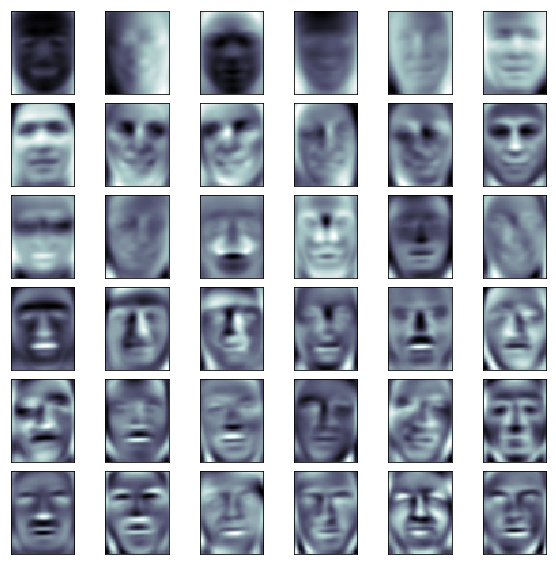

In [66]:
plot_faces(pca.components_[:36,:])

In [67]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [68]:
faces2.data.shape

(1348, 2914)

In [71]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [72]:
len(faces2.target_names)

8